## Python statistics essential training - 03_09_challenge

Standard imports

In [27]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
import mailbox
import csv

In [5]:
messages = pd.read_csv('mbox-cleaned.csv')

In [6]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('America/Los_Angeles'))

In [7]:
messages['dayofweek'] = pd.Categorical(messages['dayofweek'],
                                       ordered = True,
                                       categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [115]:
def to_name(name):
    match = re.search('"(.+)"', name)
    return match
   
    if match == None:
        return name.group(0)
    else:
        return match.group(1)
    


messages['to_name'] = messages['to'].apply(to_name)


In [116]:
messages

,subject,from,to,date,dayofweek,timeofday,nyear,days,to_name
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>",2017-11-27 14:18:46-08:00,Monday,14.300000,2017.907860,0,"<re.Match object; span=(0, 16), match='""Trevor..."
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...",2018-03-26 18:38:16-07:00,Monday,18.633333,2018.234843,0,"<re.Match object; span=(0, 19), match='""Heathe..."
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,2018-02-13 14:54:50-08:00,Tuesday,14.900000,2018.122165,1,None
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,2018-01-26 11:40:04-08:00,Friday,11.666667,2018.072515,4,None
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>",2017-10-30 17:13:00-07:00,Monday,17.216667,2017.831533,0,"<re.Match object; span=(0, 16), match='""Angela..."
...,...,...,...,...,...,...,...,...,...
1025,Walk begin around during seat affect within.,Michele Vallisneri <michele.vallisneri@jpl.nas...,<josephrodriguez@jimenez.net>,2018-03-26 10:40:36-07:00,Monday,10.666667,2018.233934,0,None
1026,Page paper gun course represent will.,Michele Vallisneri <michele.vallisneri@jpl.nas...,<hshaw@yahoo.com>,2018-03-06 21:44:22-08:00,Tuesday,21.733333,2018.180440,1,None
1027,Rate sing campaign wall similar seven staff pr...,Michele Vallisneri <michele.vallisneri@jpl.nas...,Dr. Donna Nguyen <emma32@aguirre.com>,2018-01-23 14:34:19-08:00,Tuesday,14.566667,2018.064632,1,None
1028,Education outside strong build time organizati...,Michele Vallisneri <michele.vallisneri@jpl.nas...,<charles67@gmail.com>,2017-12-20 08:28:47-08:00,Wednesday,8.466667,2017.970165,2,None


In [117]:
days = messages['dayofweek'].cat.categories
days

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

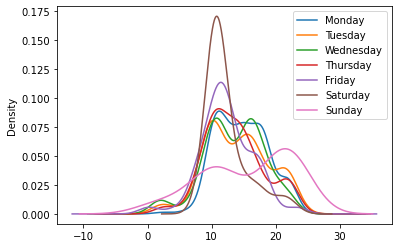

In [122]:
messages.groupby('dayofweek')['timeofday'].plot(kind = 'density')
pp.legend(messages['dayofweek'].cat.categories)


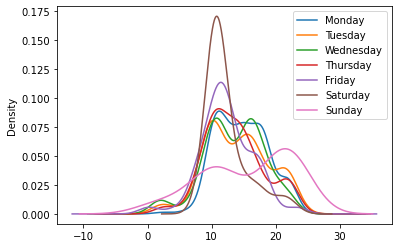

In [78]:
for day in days:
    messages[messages['dayofweek'] == day]['timeofday'].plot(kind = 'density')
pp.legend(days)

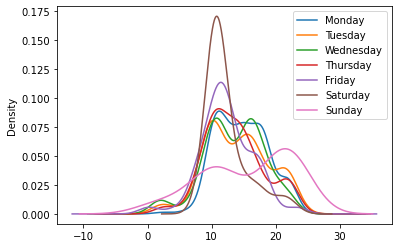

In [57]:
messages

,subject,from,to,date,dayofweek,timeofday,nyear,days
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>",2017-11-27 14:18:46-08:00,Monday,14.300000,2017.907860,0
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...",2018-03-26 18:38:16-07:00,Monday,18.633333,2018.234843,0
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,2018-02-13 14:54:50-08:00,Tuesday,14.900000,2018.122165,1
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,2018-01-26 11:40:04-08:00,Friday,11.666667,2018.072515,4
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>",2017-10-30 17:13:00-07:00,Monday,17.216667,2017.831533,0
...,...,...,...,...,...,...,...,...
1025,Walk begin around during seat affect within.,Michele Vallisneri <michele.vallisneri@jpl.nas...,<josephrodriguez@jimenez.net>,2018-03-26 10:40:36-07:00,Monday,10.666667,2018.233934,0
1026,Page paper gun course represent will.,Michele Vallisneri <michele.vallisneri@jpl.nas...,<hshaw@yahoo.com>,2018-03-06 21:44:22-08:00,Tuesday,21.733333,2018.180440,1
1027,Rate sing campaign wall similar seven staff pr...,Michele Vallisneri <michele.vallisneri@jpl.nas...,Dr. Donna Nguyen <emma32@aguirre.com>,2018-01-23 14:34:19-08:00,Tuesday,14.566667,2018.064632,1
1028,Education outside strong build time organizati...,Michele Vallisneri <michele.vallisneri@jpl.nas...,<charles67@gmail.com>,2017-12-20 08:28:47-08:00,Wednesday,8.466667,2017.970165,2
